In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
from sklearn import datasets

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from scipy.stats import zscore
teens_df = pd.read_csv("D:\ML-Data\snsdata.csv")

In [5]:
import numpy as np

In [6]:
from scipy.stats import zscore

In [8]:
teens_df = pd.read_csv("D:\ML-Data\snsdata.csv")

In [7]:
from sklearn.metrics import silhouette_score

In [8]:
teens_df_rows , teens_df_cols = teens_df.shape
print(teens_df_rows)
print(teens_df_cols)

30000
40


In [9]:
teens_df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
5,2006,F,NaN,142,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
6,2006,F,18.930,72,0,0,0,0,0,0,...,0,2,0,0,2,0,0,0,0,0
7,2006,M,18.322,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2006,F,19.055,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2006,F,18.708,39,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


Check for missing values in the columns

 for col in teens_df:
   print (col)
   print (teens_df[col].value_counts(dropna=False))

In [10]:
teens_df = teens_df.fillna({'age': teens_df.age.mean()})       ## Crude way of addresssing missing value cases                                                                                                      

Think of a better strategy of handling missing values in age.... could we have guessed the age from any other column?

In the folowing line, interest columns are extrated and stored in separate dataframe called interest_df. These columns will form the dimensions for the cluster analysis. Notice, the interest column seem to be some kind of relative weights and since we don't know what is the range of weights, we will scale all the interest columns

In [11]:
interest_df = teens_df.loc[:, 'basketball':'drugs']

In [12]:
interest_df_z = interest_df.apply(zscore)

In [13]:
cluster = KMeans( n_clusters = 3 , random_state = 2354 )
cluster.fit(interest_df_z)
cluster

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

In [14]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.36334477,  0.38655621,  0.13123552,  0.16282389,  0.10084128,
         0.26756711,  0.19990133,  0.27207689,  0.10346534,  0.82861202,
         0.48842814,  1.98726992,  0.51392589,  0.33846268,  2.89991886,
         0.45229162,  0.60613005,  0.18455414,  1.22348061,  1.21742518,
         0.39874168,  0.16516662,  0.11684551,  0.07431797,  2.55857709,
         0.55228609,  0.35883823,  0.64465442,  0.30013309,  1.29434624,
         0.41536335,  0.46736237,  1.65469914,  0.90767493,  1.7491808 ,
         2.59549926],
       [-0.14675383, -0.14567829, -0.07564604, -0.10216437, -0.10927668,
        -0.09602356, -0.11297739, -0.08822842, -0.04521259, -0.11405185,
        -0.17660205, -0.09588538, -0.08143448, -0.13319067, -0.13208338,
        -0.1492863 , -0.05014121, -0.01415448, -0.12574752, -0.10931289,
        -0.1007579 , -0.13863543, -0.07003229, -0.06014522, -0.19898825,
        -0.1319478 , -0.02824204, -0.18122755, -0.22266346, -0.18403531,
        -0.1508074 , -0.14419

In [15]:
centroids = cluster.cluster_centers_
centroids
centroid_df = pd.DataFrame(centroids, columns = list(interest_df) )
centroid_df.transpose()

,0,1,2
basketball,0.363345,-0.146754,0.497858
football,0.386556,-0.145678,0.489324
soccer,0.131236,-0.075646,0.267212
softball,0.162824,-0.102164,0.363607
volleyball,0.100841,-0.109277,0.402764
swimming,0.267567,-0.096024,0.320126
cheerleading,0.199901,-0.112977,0.398344
baseball,0.272077,-0.088228,0.289185
tennis,0.103465,-0.045213,0.154983
sports,0.828612,-0.114052,0.283775


Let us look for 5 clusters. Why 5? Discuss 

In [22]:
labels = cluster.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 1122 22932  5946]


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

In [19]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans( num_clusters, n_init = 10 )
  clusters.fit(interest_df_z)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,cluster_errors,num_clusters
0,1.080000e+06,1
1,1.023758e+06,2
2,9.941142e+05,3
3,9.677655e+05,4
4,9.424721e+05,5
5,9.133941e+05,6
6,8.990060e+05,7
7,8.724537e+05,8
8,8.585596e+05,9
9,8.383768e+05,10


The total sum of squared distances of every data point from respective centroid is also called inertia. Let us print the inertia value for all K values. That K at which the inertia stop to drop significantly (elbow method) will be the best K.

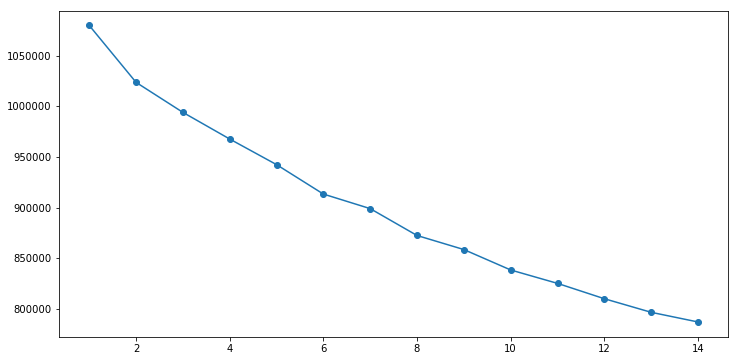

In [20]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [21]:
kmeans = KMeans(n_clusters= 6, n_init = 10, random_state=2345)

In [22]:
kmeans.fit(interest_df_z)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2345, tol=0.0001, verbose=0)

In [27]:
labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[ 5259     1   598  1067   610 22465]


In [28]:
centroids = kmeans.cluster_centers_
centroids

array([[  5.14299237e-01,   5.13932027e-01,   2.89502421e-01,
          3.86921192e-01,   4.22264129e-01,   3.16972548e-01,
          4.57292560e-01,   2.80881767e-01,   1.25436583e-01,
          2.97281060e-01,   6.73647528e-01,  -3.07441717e-04,
          2.79719607e-01,   5.08754765e-01,  -2.85793185e-02,
          5.36999444e-01,  -4.76075708e-02,  -1.09616385e-01,
          2.31213169e-01,   1.89016867e-01,   6.85317565e-02,
          2.68995572e-01,  -8.21926439e-03,  -8.65859957e-02,
          3.23390514e-01,   4.23528259e-01,   4.80782059e-02,
          6.69309392e-01,   8.80574510e-01,   4.96789086e-01,
          6.12022784e-01,   5.68193871e-01,   2.44245117e-02,
          8.29525568e-02,   7.89225130e-03,  -6.47982621e-02],
       [ -3.32217264e-01,   2.47779503e+00,  -2.42874104e-01,
         -2.17927819e-01,  -2.23669630e-01,   1.67433426e+00,
         -2.07327097e-01,  -2.01130618e-01,  -1.68938902e-01,
         -2.97123387e-01,   8.43855726e-01,   1.93955434e+01,
       

In [29]:
centroid_df = pd.DataFrame(centroids, columns = list(interest_df) )

In [30]:
centroid_df.transpose()

,0,1,2,3,4,5
basketball,0.514299,-0.332217,-0.087001,0.374740,0.101712,-0.138568
football,0.513932,2.477795,0.064307,0.381072,0.037412,-0.141189
soccer,0.289502,-0.242874,-0.098843,0.146432,0.030585,-0.072883
softball,0.386921,-0.217928,-0.021245,0.165979,0.023643,-0.098484
volleyball,0.422264,-0.223670,-0.069494,0.114640,0.019696,-0.102924
swimming,0.316973,1.674334,0.044084,0.265754,0.079326,-0.090190
cheerleading,0.457293,-0.207327,-0.109787,0.209959,-0.022459,-0.113431
baseball,0.280882,-0.201131,-0.111383,0.274912,0.037677,-0.076828
tennis,0.125437,-0.168939,0.041324,0.117507,0.062557,-0.037722
sports,0.297281,-0.297123,-0.101881,0.856797,0.002159,-0.107585


Let us put the centroids back to the teens data frame and extract other information which were not included in clustering

kmeans.labels_
pd.DataFrame(kmeans.labels_, columns = "label")

In [64]:
## creating a new dataframe only for labels and converting it into categorical variable
teens_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))

teens_labels['labels'] = teens_labels['labels'].astype('category')

In [65]:
# Joining the label dataframe with the teens data frame to create teens_df_labeled. Note: it could be appended to original dataframe
teens_df_labeled = teens_df.join(teens_labels)

In [66]:
teen_analysis = (teens_df_labeled.groupby(['labels'] , axis=0)).head(30000)  # the groupby creates a groupeddataframe that needs 
# to be converted back to dataframe. I am using .head(30000) for that
teen_analysis

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,labels
0,2006,M,18.98200,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,2006,F,18.80100,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2006,M,18.33500,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,5
3,2006,F,18.87500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
4,2006,NaN,18.99500,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,3
5,2006,F,17.99395,142,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,5
6,2006,F,18.93000,72,0,0,0,0,0,0,...,2,0,0,2,0,0,0,0,0,0
7,2006,M,18.32200,17,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,5
8,2006,F,19.05500,52,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
9,2006,F,18.70800,39,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,5


In [28]:
    from pandas import ExcelWriter
    writer = ExcelWriter('d:\groups.xls')
    teen_analysis.to_excel(writer,'Sheet1')
    writer.save()
